In [1]:
import warnings
import vectorbt as vbt
warnings.filterwarnings('ignore')
%matplotlib inline

### IFR (Índice de Força Relativa) ou RSI (Relative strength index) 



Indica momento de **sobrecompra** e **sobrevenda** de um ativo. Composto por apenas uma linha desenhada separada do preço dos ativos. Os valores oscilam entre 0 e 100.

* Quanto mais **próximo de 100** o valor do indicador, maior o nível de **sobrecompra** do ativo.

* Quanto mais **próximo de 0** o valor do indicador, maior o nível de **sobrevenda** do ativo.

(tirar) Temos também duas linhas fixas que indicam o nível de sobrecompra e o nível de sobrevenda.

Podemos usar seus sinais para tentar prever reversões de tendências. Ao utilizar o IFR dessa forma presumimos que os momentos de sobrecompra ou sobrevenda de um ativo precedem um movimento contrário de seu preço.

**IFR com Vectorbt**

In [2]:
# Dados da empresa Azul
dados = vbt.YFData.download('AZUL4.SA').get()

In [3]:
dados.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-04-11 00:00:00+00:00,21.809999,22.980000,21.770000,22.400000,13060500,0,0
2017-04-12 00:00:00+00:00,22.450001,22.990000,22.299999,22.959999,1745900,0,0
2017-04-13 00:00:00+00:00,22.969999,23.010000,22.549999,22.990000,549600,0,0
2017-04-17 00:00:00+00:00,23.000000,23.000000,22.620001,22.850000,249300,0,0
2017-04-18 00:00:00+00:00,22.820000,24.790001,22.600000,23.910000,1125100,0,0
2017-04-19 00:00:00+00:00,24.000000,24.340000,23.900000,23.920000,442100,0,0
2017-04-20 00:00:00+00:00,24.110001,24.389999,23.510000,23.860001,740100,0,0
2017-04-24 00:00:00+00:00,24.100000,24.420000,23.700001,24.200001,383100,0,0
2017-04-25 00:00:00+00:00,24.200001,24.250000,23.930000,24.100000,285100,0,0


O Vectorbt nos permite plotar facilmente o gráfico OHLCV, isto é, open (O), high (H), low (L), close (C) de cada dia no candlestick e o volume diário no gráfico de barras logo abaixo:

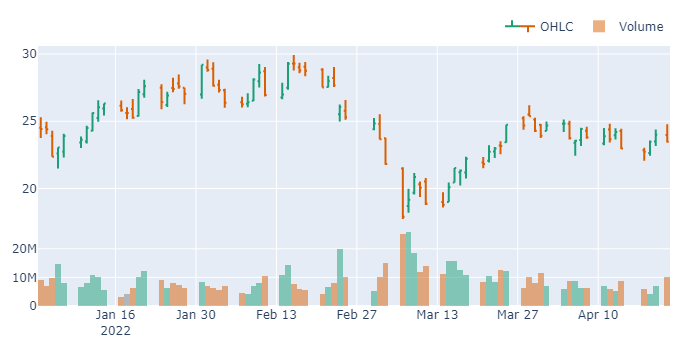

In [4]:
dados['2022'].vbt.ohlcv.plot().show_png()

Selecionando apenas o preço de fechamento

In [5]:
preco_fechamento  = dados['Close']

Executando o IFR (ou RST em inglês)

In [6]:
rsi = vbt.RSI.run(preco_fechamento, window=14)

In [7]:
# amostra do resultado
rsi.rsi.tail()

Date
2022-04-14 00:00:00+00:00    38.944724
2022-04-18 00:00:00+00:00    37.990193
2022-04-19 00:00:00+00:00    38.367849
2022-04-20 00:00:00+00:00    48.041781
2022-04-22 00:00:00+00:00    47.119075
Name: (14, Close), dtype: float64

***

### Estratégia

* **COMPRAR** (= +1) quando o valor do índice estiver ABAIXO de 30 (sobrevendido).
* **VENDER** (= -1) quando o valor do índice estiver ACIMA de 70 (sobrecomprado).

In [8]:
compras = rsi.rsi_crossed_below(30) # sobrevendido
vendas = rsi.rsi_crossed_above(70) # sobrecomprado

Visualizando o IRF e os limites de sobrecompra (70) e sobrevenda (30):

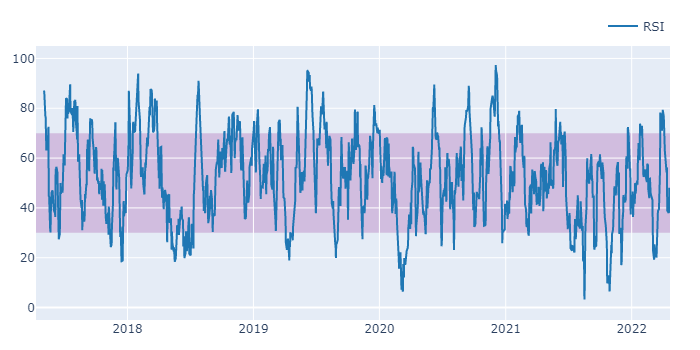

In [9]:
vbt.RSI.run(preco_fechamento).plot(levels=(30, 70)).show_png()

### Execução do Backtest

Vamos agora passar o histórico de preços do ativo além dos pontos de entrada e saída. Defini também um investimento inicial de 100 e a frequência dos dados como diária:

In [10]:
portfolio = vbt.Portfolio.from_signals(preco_fechamento, compras, vendas, init_cash=100, freq='d')

In [11]:
portfolio.stats()

Start                         2017-04-11 00:00:00+00:00
End                           2022-04-22 00:00:00+00:00
Period                               1251 days 00:00:00
Start Value                                       100.0
End Value                                      54.55083
Total Return [%]                              -45.44917
Benchmark Return [%]                           4.776784
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              80.402512
Max Drawdown Duration                 983 days 00:00:00
Total Trades                                         13
Total Closed Trades                                  13
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  76.923077
Best Trade [%]                                31.866891
Worst Trade [%]                              -61

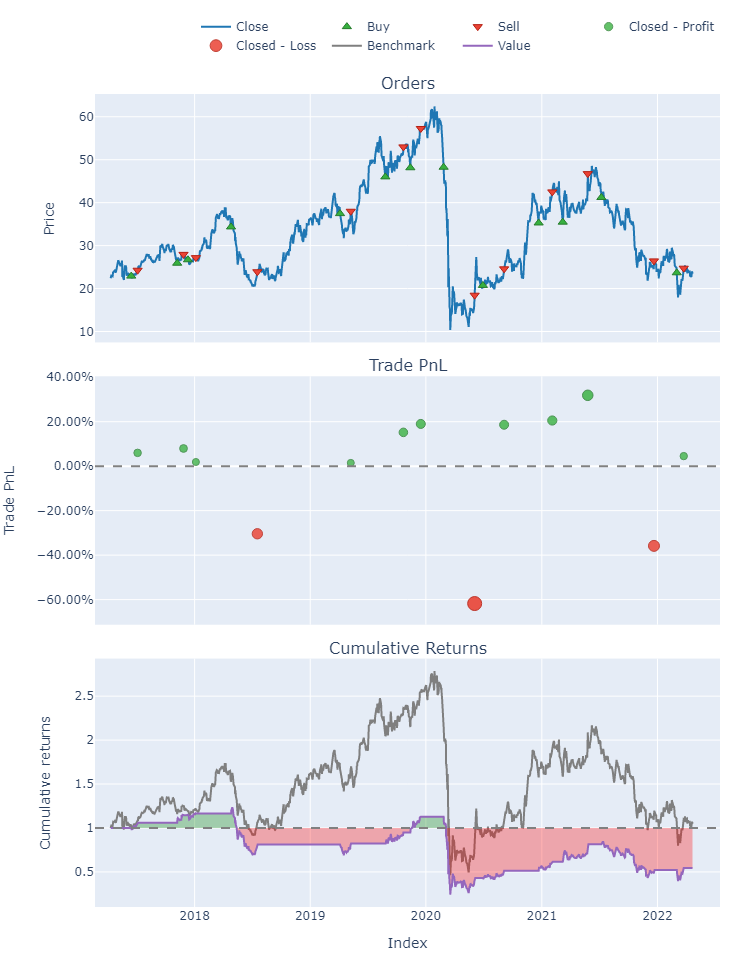

In [12]:
portfolio.plot().show_png()

### Comparando desempenho de Azul, Gol e Latam usando a mesma estratégia

In [13]:
simbolos = ["AZUL4.SA", "GOLL4.SA", "LTMAQ"]
fechamento = vbt.YFData.download(simbolos).get('Close')
fechamento.ffill(inplace=True)

In [14]:
fechamento.tail()

symbol,AZUL4.SA,GOLL4.SA,LTMAQ
Date,,,
2022-04-18 00:00:00+00:00,22.730000,15.89,0.31
2022-04-19 00:00:00+00:00,23.469999,16.41,0.31
2022-04-20 00:00:00+00:00,24.000000,16.41,0.30
2022-04-21 00:00:00+00:00,24.000000,16.41,0.30
2022-04-22 00:00:00+00:00,23.469999,15.71,0.30


In [15]:
rsi = vbt.RSI.run(fechamento, window=14)

In [16]:
compras = rsi.rsi_below(30) # sobrevendido
vendas = rsi.rsi_above(70) # sobrecomprado

In [17]:
portfolio = vbt.Portfolio.from_signals(fechamento, compras, vendas, init_cash=100, freq='d')

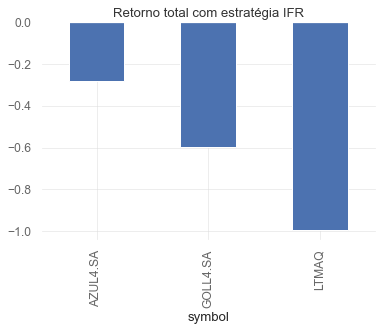

In [18]:
mean_return = portfolio.total_return().groupby('symbol').mean()
mean_return.plot(kind='bar', title='Retorno total com estratégia IFR');

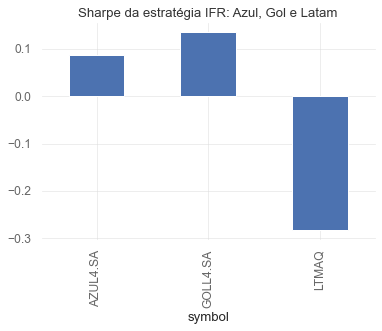

In [19]:
mean_sharpe = portfolio.sharpe_ratio().groupby('symbol').mean()
mean_sharpe.plot(kind='bar', title='Sharpe da estratégia IFR: Azul, Gol e Latam');